In [2]:
import numpy as np

waypoints_localFrame = [
        np.array([-54.31019727, 191.84449903, -19.54598818]),
        np.array([111.24089259, 427.56166121, -54.81398767]),
        np.array([-349.10709106,  558.01869306, -68.71836618]),
        np.array([1281.36380015, 1647.50529027, -39.35361376]),
        np.array([654.62948546, 1186.61595725, -48.4778713]),
        np.array([-606.74433428, 332.44253661, -20.41775233]),
        np.array([1349.86835614, 1047.23075279, -46.89420337]),
        np.array([231.41034119, -858.69285702, -63.3150879]),
        np.array([45.56236659, 921.05755228, -65.76412603]),
        np.array([1960.32237043, 1423.88737415, -89.97019481]),
        np.array([1098.14343253, 1987.40560248, -45.45757708]),
        np.array([10.15805303, -752.47151722, -68.15878792]),
        np.array([1532.81368707, 1255.13690297, -48.47378546]),
        np.array([-561.74721182, 28.52558036, -29.92751284]),
        np.array([1958.28017108, 1381.24222162, -76.75680176]),
        np.array([-1025.65838348, 274.39353778, -76.31593519]),
        np.array([410.36797363, -956.93367913, -84.31272572]),
        np.array([247.67056987, 579.07900331, -75.04176954]),
        np.array([345.53461945, 1330.35839896, -73.5301525]),
        np.array([1073.3882324, 1613.84763245, -50.72357905])
    ]

# waypoints_localFrame = np.array(waypoints_localFrame)[:, :2]

waypoints_localFrame

[array([-54.31019727, 191.84449903, -19.54598818]),
 array([111.24089259, 427.56166121, -54.81398767]),
 array([-349.10709106,  558.01869306,  -68.71836618]),
 array([1281.36380015, 1647.50529027,  -39.35361376]),
 array([ 654.62948546, 1186.61595725,  -48.4778713 ]),
 array([-606.74433428,  332.44253661,  -20.41775233]),
 array([1349.86835614, 1047.23075279,  -46.89420337]),
 array([ 231.41034119, -858.69285702,  -63.3150879 ]),
 array([ 45.56236659, 921.05755228, -65.76412603]),
 array([1960.32237043, 1423.88737415,  -89.97019481]),
 array([1098.14343253, 1987.40560248,  -45.45757708]),
 array([  10.15805303, -752.47151722,  -68.15878792]),
 array([1532.81368707, 1255.13690297,  -48.47378546]),
 array([-561.74721182,   28.52558036,  -29.92751284]),
 array([1958.28017108, 1381.24222162,  -76.75680176]),
 array([-1025.65838348,   274.39353778,   -76.31593519]),
 array([ 410.36797363, -956.93367913,  -84.31272572]),
 array([247.67056987, 579.07900331, -75.04176954]),
 array([ 345.534619

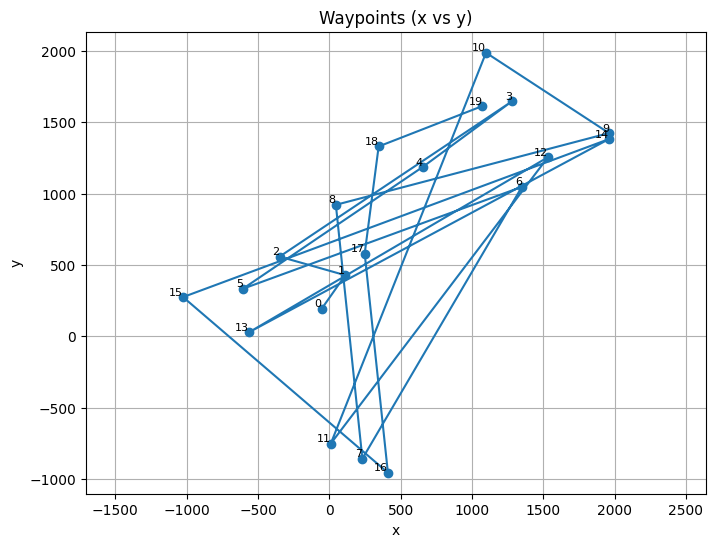

In [3]:
import matplotlib.pyplot as plt

def plot_path(waypoints):
    arr = np.array(waypoints)
    x, y = arr[:, 0], arr[:, 1]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, '-o')
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.text(xi, yi, str(i), fontsize=8, ha='right', va='bottom')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Waypoints (x vs y)')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

plot_path(waypoints_localFrame)

In [4]:
def generate_distance_matrix(waypoints)-> np.ndarray:
    n = len(waypoints)
    dist = np.full((n, n), np.inf)
    for i in range(n):
        for j in range(n):
            if i != j:
                dist[i][j] = np.linalg.norm(waypoints[i] - waypoints[j])
    return dist


distance_matrix = generate_distance_matrix(waypoints_localFrame)

In [5]:
def optimal_path(cost_matrix: np.ndarray)-> np.array:
    visted = cost_matrix.shape[0] * [False]
    index=0
    node_order = []
    while not all(visted):
        sorted_cost = np.sort(cost_matrix[index])
        for d in sorted_cost:
                next_index = np.where(cost_matrix[index] == d)[0][0]
                if not visted[next_index]:
                    node_order.append(next_index)
                    visted[next_index] = True
                    index = next_index
                    break
    return node_order

node_order = optimal_path(distance_matrix)

Total Distance:  10439.641391211466


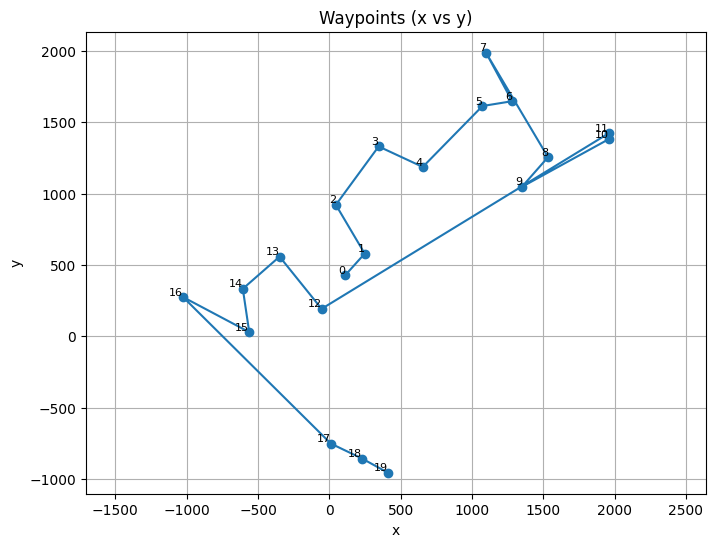

In [6]:
optimial_waypoint = [waypoints_localFrame[i] for i in node_order]
total_distance = 0.0

waypoints = waypoints_localFrame

for i in range(len(optimial_waypoint)-1):
    total_distance += np.linalg.norm(optimial_waypoint[i] - optimial_waypoint[i+1])

print("Total Distance: ", total_distance)
plot_path(optimial_waypoint)

In [7]:

def slope_penalty(slope: float) -> float:
    if slope >= 0: #uphill
        return 10 * slope
    elif slope < 0: #downhill
        return 5 * abs(slope)
    else:
        return 0.0

def calculate_metric(p1: list[int], p2: list[int]) -> dict:
    direction = np.array(p2) - np.array(p1)
    distance = np.linalg.norm(direction)
    _,_, dz = direction
    slope = dz / distance
    return {"distance": distance, "slope": slope_penalty(slope), "direction": direction}


def generate_slope_matrix(waypoints: list[np.array]) -> np.array:
    n = len(waypoints)
    slope_matrix = np.full((n, n), np.inf)
    for i in range(n):
        for j in range(n):
            if i != j:
                slope_matrix[i][j] = calculate_metric(waypoints[i], waypoints[j])["slope"]
    return slope_matrix

    

In [8]:
def optmize_path_dist_slope(waypoints: list[np.array]) -> list[int]:
    slope_matrix = generate_slope_matrix(waypoints)
    distance_matrix = generate_distance_matrix(waypoints)

    cost_matrix = distance_matrix * slope_matrix
    
    node_order = optimal_path(cost_matrix)

    return node_order


In [9]:
slope_path = optmize_path_dist_slope(waypoints_localFrame)
distance_path = optimal_path(distance_matrix)


In [10]:
print("Distance Optimized Path:", distance_path)
print("Slope + Distance Optimized Path:", slope_path)

Distance Optimized Path: [1, 17, 8, 18, 4, 19, 3, 10, 12, 6, 14, 9, 0, 2, 5, 13, 15, 11, 7, 16]
Slope + Distance Optimized Path: [5, 0, 13, 3, 10, 6, 12, 4, 19, 1, 7, 8, 11, 2, 18, 17, 15, 14, 16, 9]


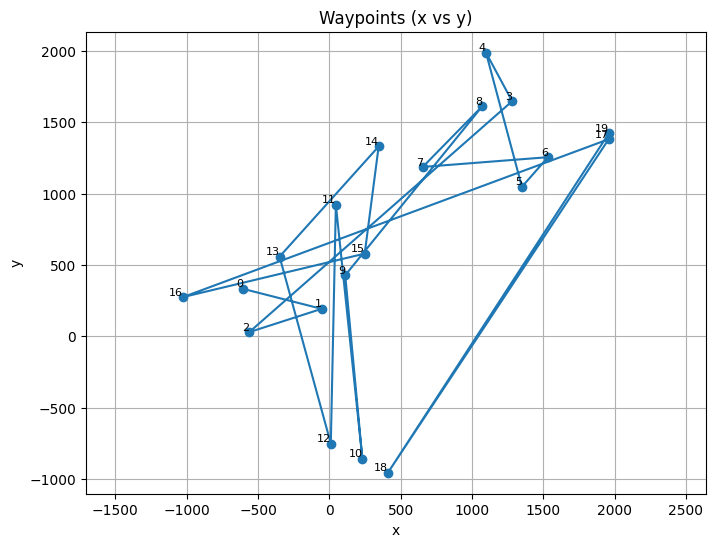

In [11]:
slope_path_wapoints = [waypoints_localFrame[i] for i in slope_path]
plot_path(slope_path_wapoints)


In [12]:
total_distance = 0.0
for i in range(len(slope_path_wapoints)-1):
    total_distance += np.linalg.norm(slope_path_wapoints[i] - slope_path_wapoints[i+1]) 
print("Total Distance with slope optimization: ", total_distance)

Total Distance with slope optimization:  26246.744489471588


In [13]:
import numpy as np

(-0.5, 511.5, 511.5, -0.5)

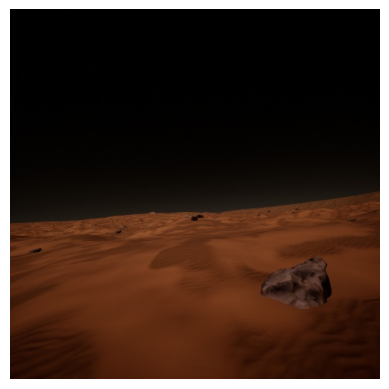

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
image_path = './STU3_Mavericks/mars_images/image_0172.jpg'
img_cv = cv.imread(image_path)

plt.imshow(cv.cvtColor(img_cv, cv.COLOR_BGR2RGB))
plt.axis('off')

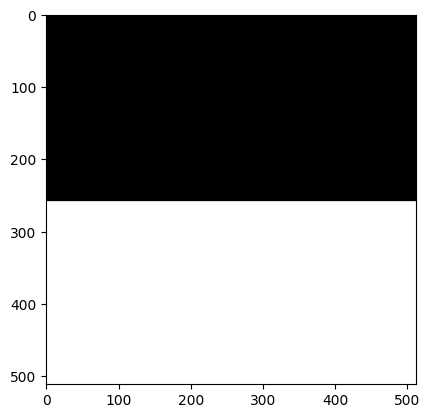

In [92]:
import cv2
import numpy as np

# Read image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the horizon line (transition from black to brown)
# Calculate variance along each row
row_variances = np.var(gray, axis=1)

# Find where variance increases (horizon line)
# Smooth the variance curve
from scipy.ndimage import gaussian_filter1d
smoothed = gaussian_filter1d(row_variances, sigma=10)

# Find first significant increase
threshold = np.max(smoothed) * 0.3
horizon_y = np.argmax(smoothed > threshold)

# Create mask: everything below horizon is terrain
terrain_mask = np.zeros(gray.shape, dtype=np.uint8)
terrain_mask[horizon_y:, :] = 255

# Extract terrain
terrain_only = cv2.bitwise_and(img, img, mask=terrain_mask)
plt.imshow(cv2.cvtColor(terrain_mask, cv2.COLOR_BGR2RGB))

Detected 426 lines


Text(0.5, 1.0, 'Grayscale Image')

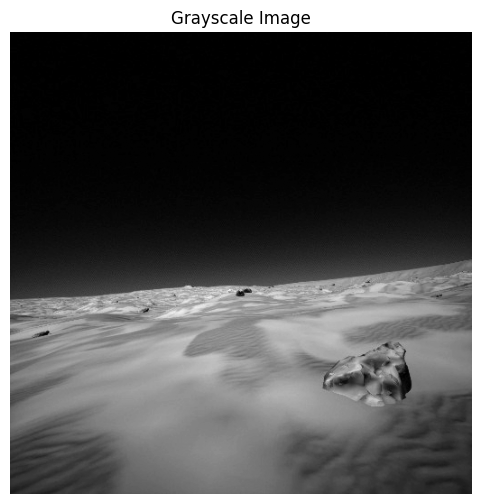

In [86]:
# Convert BGR image (img_cv) to grayscale and display it
img_gray = cv.cvtColor(img_cv, cv.COLOR_BGR2GRAY)

# img_gray = cv.Canny(img_gray, 100, 100)

lines = cv.HoughLinesP(
    img_gray, 
    rho=1, 
    theta=np.pi/180, 
    threshold=100,
    minLineLength=200,  # Minimum line length
    maxLineGap=10
)

print(f"Detected {len(lines)} lines")

plt.figure(figsize=(8, 6))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

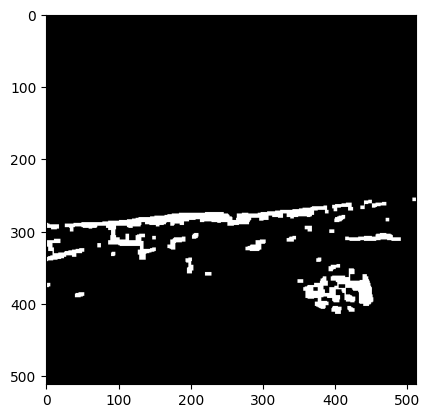

In [97]:
import cv2
import numpy as np

# Read image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Estimate background (smooth terrain) with heavy blur
background = cv2.GaussianBlur(gray, (51, 51), 0)

# Subtract background to get foreground objects
# Use absolute difference to catch both darker and lighter objects
foreground = cv2.absdiff(gray, background)

# Threshold the difference
_, rock_mask = cv2.threshold(foreground, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Clean up
kernel = np.ones((3,3), np.uint8)
rock_mask = cv2.morphologyEx(rock_mask, cv2.MORPH_OPEN, kernel, iterations=2)
rock_mask = cv2.morphologyEx(rock_mask, cv2.MORPH_CLOSE, kernel, iterations=2)
plt.imshow(rock_mask, cmap='gray')

# Obstacle avoidance based on depth image


In [2]:
import cv2 as cv
import numpy as np

In [8]:
depth_img = cv.imread('/images/depth_images/depth_0032.png', cv.IMREAD_UNCHANGED)

[ WARN:0@77.046] global loadsave.cpp:268 findDecoder imread_('/images/depth_images/depth_0032.png'): can't open/read file: check file path/integrity


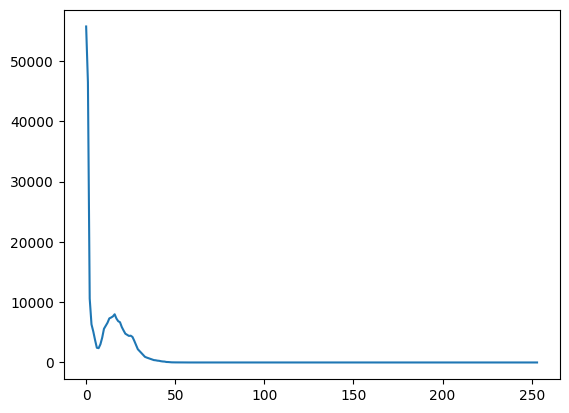

In [5]:
# Extract rocks based on depth values
# Assuming rocks are closer to the camera (lower depth values)

#get value historgram 
import matplotlib.pyplot as plt
hist = cv.calcHist([depth_img], [0], None, [256], [0, 256])
hist = hist[:-2]
plt.plot(hist)

In [6]:
# based on depth image generate an rgb image 
depth_colored = cv.applyColorMap(cv.convertScaleAbs(depth_img, alpha=0.03), cv.COLORMAP_JET)
print("shape of depth colored image", depth_colored.shape)
print(" shape of depth image", depth_img.shape)


shape of depth colored image (512, 512, 3)
 shape of depth image (512, 512, 3)


In [7]:
#based on depth image generate an rgb image
depth_colored = cv.applyColorMap(cv.convertScaleAbs(depth_img, alpha=0.03), cv.COLORMAP_JET)

for i in range(depth_colored.shape[0]):
    for j in range(depth_colored.shape[1]):
        if depth_img[i][j] >240:
            depth_colored[i][j] = [0,0,0]
        # if depth_img[i][j] < 0:
        #     depth_colored[i][j] = [255,255,255]

plt.imshow(depth_colored)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<BarContainer object of 10 artists>

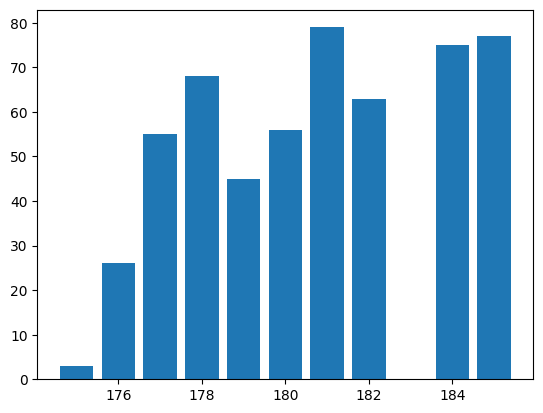

In [8]:
plotting_depth = depth_img.flatten()

unique, counts = np.unique(plotting_depth, return_counts=True)
depth_histogram = dict(zip(unique, counts))
#sort dict
depth_histogram = dict(sorted(depth_histogram.items() , key=lambda item: item[1]))

#limit to top 10 values
depth_histogram = dict(list(depth_histogram.items())[:10])
plt.bar(list(depth_histogram.keys()), list(depth_histogram.values()))

In [184]:
#given an depth_image calculated gradients using sobel filter and 

def sobel_depth_gradients(depth_image):
    """
    Apply Sobel filter to depth image
    """
    # Compute gradients in X and Y directions
    grad_x = cv2.Sobel(depth_image, cv2.CV_64F, 1, 0, ksize=7)
    grad_y = cv2.Sobel(depth_image, cv2.CV_64F, 0, 1, ksize=7)
    
    # Compute gradient magnitude
    grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    # Compute gradient direction (optional)
    grad_direction = np.arctan2(grad_y, grad_x)
    
    return grad_magnitude, grad_direction, grad_x, grad_y

def rock_gradients(base_img: np.ndarray) -> np.ndarray:
    gradients, _, _, _ = sobel_depth_gradients(base_img)
    max_gradient = gradients.max()
    if max_gradient > 5000: #threshold to remove ground gradients
        gradients = gradients / max_gradient
        threshold = 5000 / max_gradient
    else:
        gradients = gradients * 0.0
        threshold = 0.0

    return gradients, threshold, max_gradient

def visualize_rock_gradients(depth_image: np.ndarray, gradients: np.ndarray, threshold: float):

    depth_colored = cv.applyColorMap(depth_image, cv.COLORMAP_WINTER)

    mask = gradients > threshold
    depth_colored[mask] = [128, 0, 128]

    count = int(np.count_nonzero(mask))
    return depth_colored



for i in range(479):
    depth_img = cv.imread(f'./images/depth_images/depth_0{i:03d}.png', cv.IMREAD_UNCHANGED)
    gradients, threshold, _ = rock_gradients(depth_img)
    vis_rock_img = visualize_rock_gradients(depth_img, gradients, threshold)
    plt.imsave(f'./images/rock_gradients/rock_gradients_0{i:03d}_threshold_{threshold:.2f}.png', vis_rock_img)


    # plt.imshow(depth_colored)

In [158]:
# visualize_gradients per image

max_grad = []
for i in range(479):
    depth_img = cv.imread(f'./images/depth_images/depth_0{i:03d}.png', cv.IMREAD_UNCHANGED)
    max_grad.append(rock_gradients(depth_img)[2])


Ranges: 460 13 6
Indices: [6469.332268480264, 14836.0, 5733.543755828501, 5571.977925297264, 5522.0, 5056.110956060992, 6466.702714676158, 5650.0, 6434.6027072384195, 5543.749092446375, 6469.332268480264, 14836.0, 5733.543755828501]


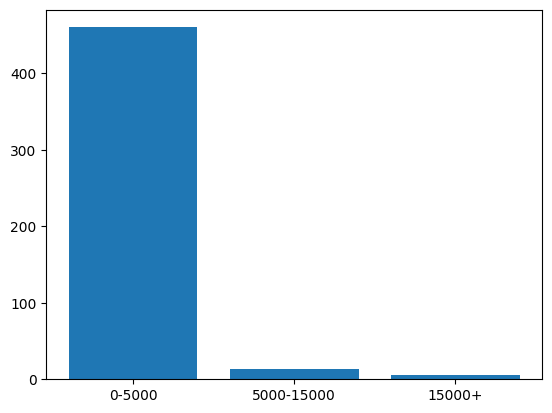

In [163]:
ranges = [[],[],[]]

for i, grad in enumerate(max_grad):
    if grad > 15000:
        ranges[2].append(i)
    elif grad > 5000:
        ranges[1].append(grad)
    else:
        ranges[0].append(i)

plt.bar(['0-5000', '5000-15000', '15000+'], [len(ranges[0]), len(ranges[1]), len(ranges[2])])
print("Ranges:", len(ranges[0]), len(ranges[1]), len(ranges[2]))
print("Indices:", ranges[1])

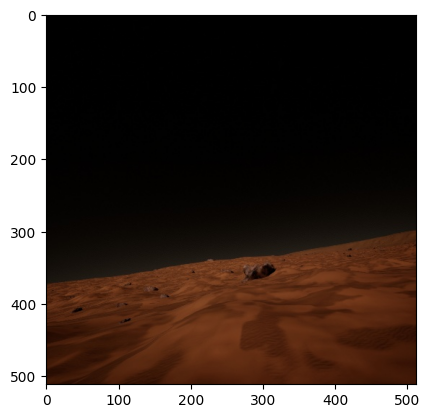

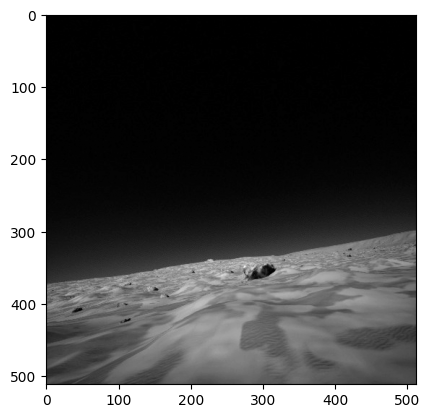

In [14]:
gray_scacle = cv.cvtColor(rgb_img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_scacle, cmap='gray')

In [15]:
conture = cv.findContours(gray_scacle, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(f"Found {len(conture[0])} contours")

Found 760 contours


Found 760 contours


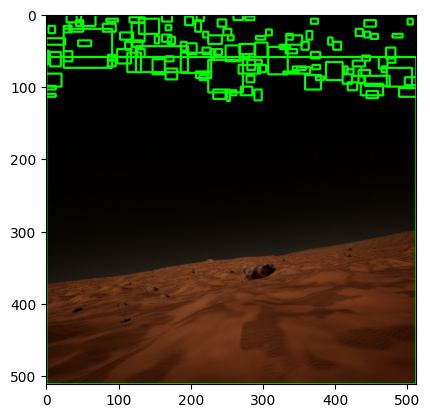

In [27]:
rgb_img = cv.imread('images/RGB_images/image_0220.jpg')
conture = cv.findContours(gray_scacle, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(f"Found {len(conture[0])} contours")

for cnt in conture[0]:
    x, y, w, h = cv.boundingRect(cnt)
    if w * h < 50 and y < 400:
        continue
    else:
        cv.rectangle(rgb_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(cv.cvtColor(rgb_img, cv.COLOR_BGR2RGB))

Found 16 contours
Detected 1 valid rocks


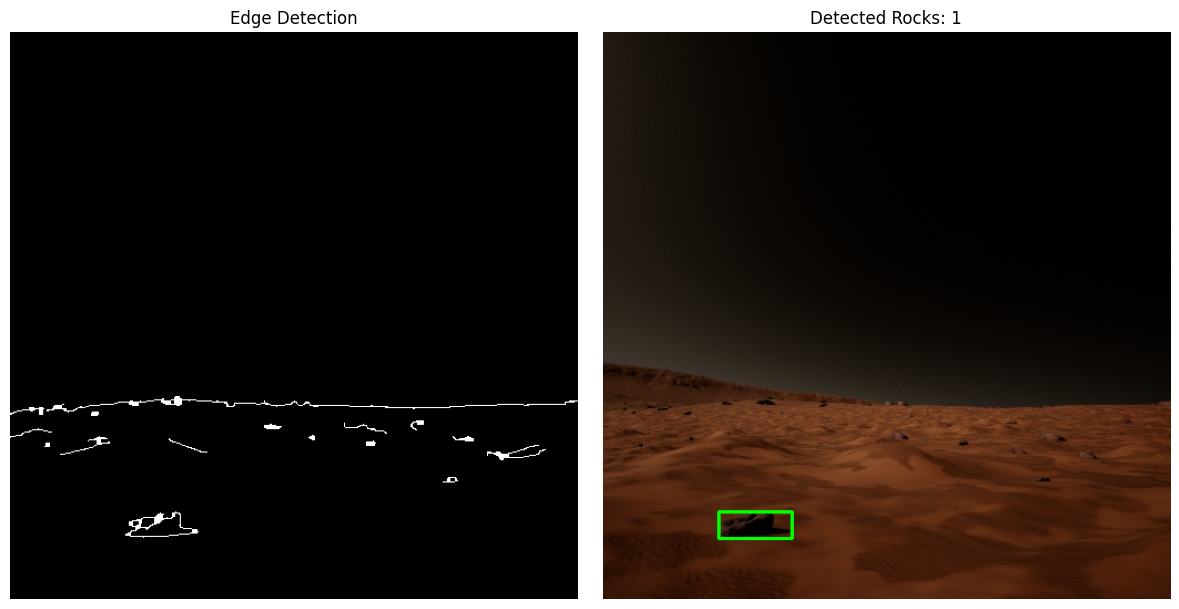

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read image
rgb_img = cv.imread('images/RGB_images/image_1575.jpg')
height, width = rgb_img.shape[:2]


# Step 2: Convert to grayscale
gray = cv.cvtColor(rgb_img, cv.COLOR_BGR2GRAY)

# Step 3: Apply preprocessing for better rock detection
# Option A: Edge detection
blurred = cv.GaussianBlur(gray, (5, 5), 0)
edges = cv.Canny(blurred, 30, 100)


# Step 4: Morphological operations to connect edges
kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)
edges = cv.erode(edges, kernel, iterations=1)

# Step 5: Find contours
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(f"Found {len(contours)} contours")

# Step 6: Filter and draw contours
output_img = rgb_img.copy()
valid_rocks = []

for cnt in contours:
    # Get bounding box
    x, y, w, h = cv.boundingRect(cnt)
    area = cv.contourArea(cnt)
    
    # Filter criteria
    min_area = 50  # Minimum area to be considered
    max_area = 50000  # Maximum area (avoid detecting entire terrain)
    min_height = height * 0.3  # Only consider lower 70% of image (below horizon)
    
    # Check if contour is in valid region (lower part of image)
    if (area > min_area and area < max_area and 
        y > min_height):  # Rocks should be in lower portion
        
        # Additional shape validation
        aspect_ratio = w / h if h > 0 else 0
        
        # Rocks typically have aspect ratio between 0.3 and 3.0
        if 0.3 < aspect_ratio < 3.0:
            cv.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            valid_rocks.append({
                'bbox': (x, y, w, h),
                'area': area,
                'center': (x + w//2, y + h//2)
            })

print(f"Detected {len(valid_rocks)} valid rocks")

# Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(output_img, cv.COLOR_BGR2RGB))
plt.title(f'Detected Rocks: {len(valid_rocks)}')
plt.axis('off')
plt.tight_layout()
plt.show()

In [53]:
import math
def detect_rock(img: np.ndarray) -> list[dict]:
    height, width = img.shape[:2]

    # Step 2: Convert to grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Step 3: Apply preprocessing for better rock detection
    blurred = cv.GaussianBlur(gray, (5, 5), 0)
    edges = cv.Canny(blurred, 30, 100)

    # Step 4: Morphological operations to connect edges
    kernel = np.ones((3, 3), np.uint8)
    edges = cv.dilate(edges, kernel, iterations=1)
    edges = cv.erode(edges, kernel, iterations=1)

    # Step 5: Find contours
    contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Step 6: Filter and collect valid rocks
    valid_rocks = []

    for cnt in contours:
        x, y, w, h = cv.boundingRect(cnt)
        area = cv.contourArea(cnt)

        # Filter criteria
        min_area = 50
        max_area = 50000
        min_height = height * 0.3

        if (area > min_area and area < max_area and 
            y > min_height):
            
            aspect_ratio = w / h if h > 0 else 0
            
            if 0.3 < aspect_ratio < 3.0:
                if y > 400:
                    valid_rocks.append({
                        'bbox': (x, y, w, h),
                        'area': area,
                        'center': (x + w//2, y + h//2),
                        'distance': math.pow((((x + w//2) - 250)**2 + ((y + h//2) - 480)**2),0.5)
                    })

    return valid_rocks

def direction_manuver(valid_rocks: dict)-> list:
    if not valid_rocks:
       return [False]
    else:
        dir = None
        distance = 0
        for rocks in valid_rocks:
            if rocks['distance'] > distance:
                distance = rocks['distance']
                if rocks['center'][0] < 250:
                    dir = -0.2
                else:
                    dir = 0.2
            
       # find the image center to 

        # return success, rock info and simple maneuver guidance
        return [True, dir]

Detected [] rocks


[False]

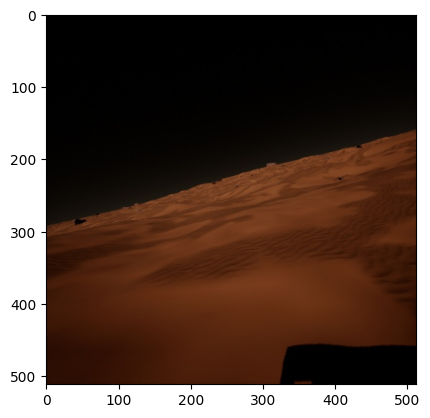

In [55]:
rgb_img = cv.imread('images/RGB_images/image_0995.jpg')
detected_rocks = detect_rock(rgb_img)
print(f"Detected {detected_rocks} rocks")

for rock in detected_rocks:
    x, y, w, h = rock['bbox']
    cv.rectangle(rgb_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(cv.cvtColor(rgb_img, cv.COLOR_BGR2RGB))
direction_manuver(detected_rocks)

In [105]:
depth_data.shape

(512, 512)

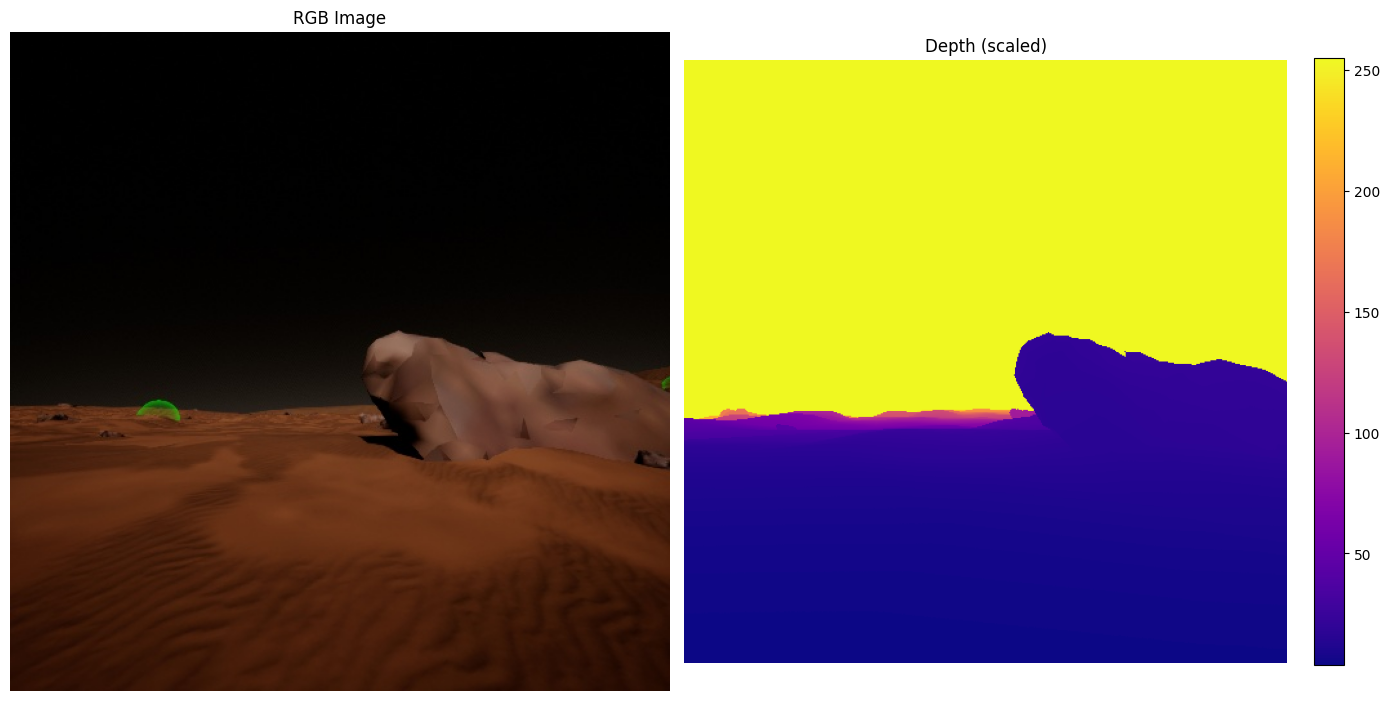

In [ ]:

# plt.imshow(depth_vis)

In [130]:
depth_data.shape

(512, 512)

In [ ]:
import numpy as np

def depth_to_pointcloud(depth_image):
    fx, fy = 256, 256
    cx, cy = 256, 256

    points = np.empty((512,512, 3), dtype=np.float32) 
    for v in range(depth_image.shape[0]):
        for u in range(depth_image.shape[1]):
            Z = depth_image[v, u]
            if Z == 0:  # skip invalid
                continue
            X = (u - cx) * Z / fx
            Y = (v - cy) * Z / fy
            points[v][u] = [X, Y, Z]
    return np.array(points)

points = depth_to_pointcloud(depth_data)

In [64]:
filtered_points = points[256:,100:400]
filtered_points.shape

(256, 300, 3)

In [99]:
i = 1
cell_points = filtered_points[i*16:(i+1)*16, i*16:(i+1)*16, :]   # shape (16, 16, 3)
cell_points = cell_points.reshape(-1, 3)            # flatten to (N,3)
cell_points = cell_points[np.argsort(cell_points[:, 2])]  # sort by z (ascending)

In [100]:
X = cell_points[:, :2]
y = cell_points[:, 2]

X_features = np.column_stack((
                                                X[:,0]**2,
                                                X[:,1]**2,
                                                X[:,0]*X[:,1],  
                                                X[:,0],
                                                X[:,1],
                                                np.ones(len(X))
                                                )) # Add bias term





In [101]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(
                    residual_threshold=0.05,
                    min_samples=min(1, len(cell_points)),
                    max_trials=100,
                    random_state=42
                )
                
ransac.fit(X_features, y)

,estimator,None
,min_samples,1
,residual_threshold,0.05
,is_data_valid,None
,is_model_valid,None
,max_trials,100
,max_skips,inf
,stop_n_inliers,inf
,stop_score,inf
,stop_probability,0.99
,loss,'absolute_error'


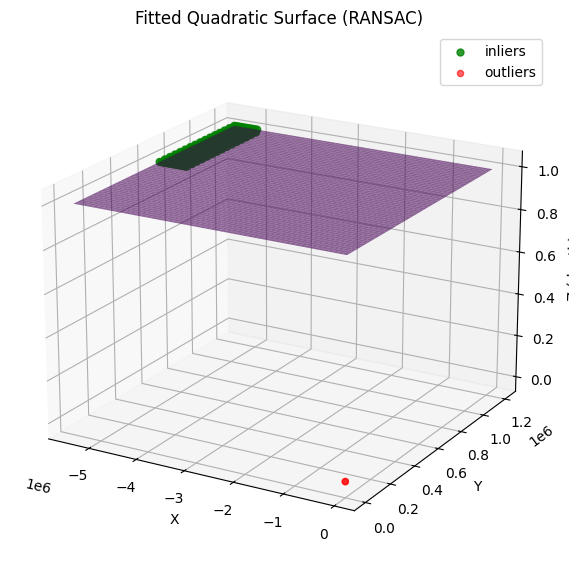

In [102]:
from mpl_toolkits.mplot3d import Axes3D

params = ransac.estimator_.coef_

#visualize the fitted quadratic surface

# params already defined: [a, b, c, d, e, f] corresponding to
# features [x^2, y^2, x*y, x, y, 1]
a, b, c, d, e, f_const = params

# prepare grid over the x,y range
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 60), np.linspace(y_min, y_max, 60))

# evaluate fitted quadratic surface on the grid
zz = a * xx**2 + b * yy**2 + c * xx * yy + d * xx + e * yy + f_const

# original points for scatter
xz = X[:, 0]
yz = X[:, 1]
zz_points = y  # or cell_points[:, 2]

# build feature matrix for the meshgrid and predict with the fitted RANSAC model
grid_x = xx.ravel()
grid_y = yy.ravel()
grid_features = np.column_stack((
    grid_x**2,
    grid_y**2,
    grid_x * grid_y,
    grid_x,
    grid_y,
    np.ones_like(grid_x)
))

# use the fitted RANSAC regressor to predict z on the grid (keeps same feature mapping/scale)
zz_pred = ransac.predict(grid_features).reshape(xx.shape)

# optional: get inlier mask to highlight inliers vs outliers
inlier_mask = getattr(ransac, "inlier_mask_", None)

#get the elevation for this plane

ransac.estimator_.intercept_

# plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# plot data points (inliers in green, outliers in red if mask available)
if inlier_mask is not None:
    inliers = inlier_mask.astype(bool)
    ax.scatter(xz[inliers], yz[inliers], zz_points[inliers], color='g', s=25, alpha=0.8, label='inliers')
    ax.scatter(xz[~inliers], yz[~inliers], zz_points[~inliers], color='r', s=20, alpha=0.6, label='outliers')
else:
    ax.scatter(xz, yz, zz_points, color='k', s=20, alpha=0.7, label='data points')

# plot predicted surface
ax.plot_surface(xx, yy, zz_pred, cmap='viridis', alpha=0.6, rstride=1, cstride=1, linewidth=0, antialiased=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z (depth)')
ax.set_title('Fitted Quadratic Surface (RANSAC)')
ax.view_init(elev=20, azim=-60)
ax.legend()
plt.show()


In [69]:
params = ransac.estimator_.coef_
intercept = ransac.estimator_.intercept_

a_xx, b_yy, c_xy, d_x, e_y, f_const = (
                        params[0], params[1], params[2], 
                        params[3], params[4], intercept
                    )

center_x = np.mean(X[:, 0])
center_y = np.mean(X[:, 1])

elevation = (a_xx * center_x**2 + 
                               b_yy * center_y**2 + 
                               c_xy * center_x * center_y + 
                               d_x * center_x + 
                               e_y * center_y + 
                               f_const)

In [70]:
elevation_list = []
elevation_list.append(elevation)

In [71]:
elevation_list

[597.8184046620534]

In [ ]:
elevation_array = np.zeros((filtered_points.shape[0] // 16, filtered_points.shape[1] // 16), dtype=np.float32)
count = 0
for i in range(filtered_points.shape[0] // 16):
    for j in range(filtered_points.shape[1] // 16):
        try:
            cell_points = filtered_points[i*16:(i+1)*16, j*16:(j+1)*16, :]   # shape (16, 16, 3)
            cell_points = cell_points.reshape(-1, 3)            # flatten to (N,3)
            cell_points = cell_points[np.argsort(cell_points[:, 2])]  # sort by z (ascending)

            X = cell_points[:, :2]
            y = cell_points[:, 2]

            X_features = np.column_stack((
                                                        X[:,0]**2,
                                                        X[:,1]**2,
                                                        X[:,0]*X[:,1],  
                                                        X[:,0],
                                                        X[:,1],
                                                        np.ones(len(X))
                                                        )) # Add bias term

            ransac = RANSACRegressor(
                                residual_threshold=0.05,
                                min_samples=min(10, len(cell_points)),
                                max_trials=100,
                                random_state=42
                            )
                            
            ransac.fit(X_features, y)

            params = ransac.estimator_.coef_
            intercept = ransac.estimator_.intercept_

            a_xx, b_yy, c_xy, d_x, e_y, f_const = (
                                    params[0], params[1], params[2], 
                                    params[3], params[4], intercept
                                )

            center_x = np.mean(X[:, 0])
            center_y = np.mean(X[:, 1])

            elevation = (a_xx * center_x**2 + 
                                            b_yy * center_y**2 + 
                                            c_xy * center_x * center_y + 
                                            d_x * center_x + 
                                            e_y * center_y + 
                                            f_const)
        except:
            elevation = 0.0
            count += 1
        elevation_array[i][j] = elevation
print(count)

In [77]:
elevation_array

array([[9.99999900e+06, 9.99999900e+06, 9.99999900e+06, 9.99999900e+06,
        9.99999900e+06, 9.99999900e+06, 9.99999900e+06, 9.99999900e+06,
        1.41690422e+05, 9.99999900e+06, 5.34858691e+03, 0.00000000e+00,
        4.49458447e+03, 4.52939014e+03, 2.88703052e+03, 2.08160229e+03,
        2.85359302e+03, 2.15169385e+03],
       [9.99999900e+06, 9.99999900e+06, 9.99999900e+06, 9.99999900e+06,
        9.99999900e+06, 6.64686035e+03, 8.55464746e+03, 4.30494092e+03,
        4.56933203e+03, 3.97968701e+03, 3.75497388e+03, 2.09542529e+03,
        2.13609595e+03, 1.97712329e+03, 2.11581787e+03, 1.83802588e+03,
        1.67434656e+03, 1.58292969e+03],
       [9.99999900e+06, 9.99999900e+06, 5.70283105e+03, 4.58428320e+03,
        3.92099878e+03, 4.29741699e+03, 2.16800049e+03, 3.50308228e+03,
        2.15170435e+03, 2.09806006e+03, 1.99320349e+03, 1.94907617e+03,
        1.98936194e+03, 1.58761206e+03, 1.60129370e+03, 2.24404834e+03,
        1.65861230e+03, 9.09660889e+02],
       [3.278

(-0.5, 1799.5, 1599.5, -0.5)

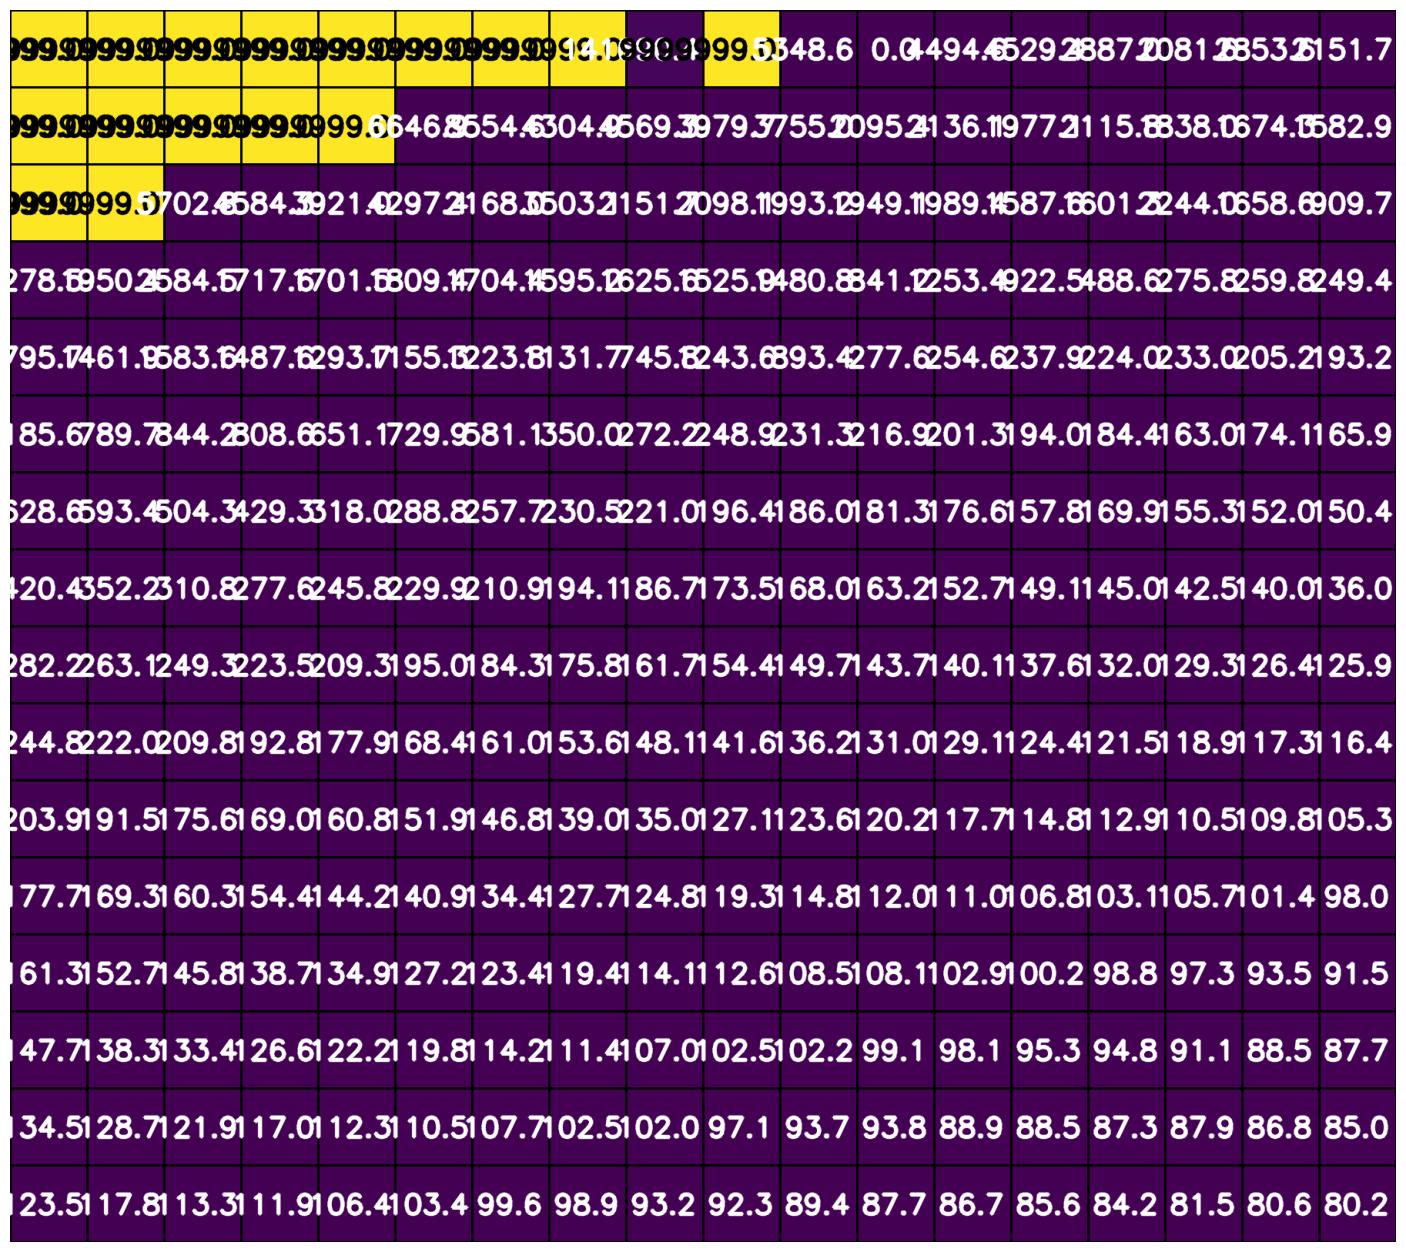

In [78]:
# visualize elevation_array with improved clarity: colored cells, grid lines, readable text
rows, cols = elevation_array.shape

# determine cell size to keep the image reasonable
max_canvas = 2500
cell_size = max(100, min(80, max_canvas // max(rows, cols)))

img_h = rows * cell_size
img_w = cols * cell_size

# normalize elevation to [0,1]
vmin = float(np.nanmin(elevation_array))
vmax = float(np.nanmax(elevation_array))
vrange = vmax - vmin if vmax != vmin else 1.0
norm = (elevation_array - vmin) / vrange
norm = np.clip(norm, 0.0, 1.0)

# map normalized values through a matplotlib colormap (RGB)
cmap = plt.get_cmap('viridis')
mapped = (cmap(norm)[:, :, :3] * 255).astype(np.uint8)  # shape (rows, cols, 3), RGB

# upscale to canvas using nearest neighbor to keep hard cell boundaries
canvas_rgb = cv.resize(mapped, (img_w, img_h), interpolation=cv.INTER_NEAREST)

# convert to BGR for OpenCV drawing
canvas = cv.cvtColor(canvas_rgb, cv.COLOR_RGB2BGR)

# draw thin grid lines for cell boundaries
line_thickness = max(1, cell_size // 40)
for r in range(rows + 1):
    y = r * cell_size 
    cv.line(canvas, (0, y), (img_w, y), (0, 0, 0), thickness=line_thickness)
for c in range(cols + 1):
    x = c * cell_size
    cv.line(canvas, (x, 0), (x, img_h), (0, 0, 0), thickness=line_thickness)

# prepare text parameters scaled to cell size
font = cv.FONT_HERSHEY_SIMPLEX
font_scale = max(0.2, min(1.2, cell_size / 60.0))
thickness = max(1, cell_size // 30)

# add numeric labels centered in each cell with contrast-aware text color
for r in range(rows):
    for c in range(cols):
        val = float(elevation_array[r, c])
        text = f"{val:.1f}"
        top_left_x = c * cell_size
        top_left_y = r * cell_size

        # pick text color based on cell brightness (compute luminance from RGB)
        cell_color_rgb = mapped[r, c].astype(np.float32)
        luminance = 0.299 * cell_color_rgb[0] + 0.587 * cell_color_rgb[1] + 0.114 * cell_color_rgb[2]
        text_color = (255, 255, 255) if luminance < 140 else (0, 0, 0)  # white on dark, black on light

        # center text
        (text_w, text_h), baseline = cv.getTextSize(text, font, font_scale, thickness)
        text_x = top_left_x + (cell_size - text_w) // 2
        text_y = top_left_y + (cell_size + text_h) // 2

        # ensure text inside bounds
        text_x = int(np.clip(text_x, top_left_x + 2, top_left_x + cell_size - text_w - 2))
        text_y = int(np.clip(text_y, top_left_y + text_h + 2, top_left_y + cell_size - 2))

        cv.putText(canvas, text, (text_x, text_y), font, font_scale, text_color, thickness, lineType=cv.LINE_AA)

# show with matplotlib and a colorbar for reference
# create a larger figure (convert pixel canvas to inches using a DPI, clamp to reasonable max)
dpi = 100
fig_w_in = min(img_w / dpi, 40)   # max width 40 inches
fig_h_in = min(img_h / dpi, 25)   # max height 25 inches
plt.figure(figsize=(fig_w_in, fig_h_in), dpi=dpi)
plt.imshow(cv.cvtColor(canvas, cv.COLOR_BGR2RGB))
plt.axis('off')



In [2]:
import numpy as np
import cv2 as cv2
depth_data = np.load('./rock_imgs/depth_npy/depth_0202.npy')
rgb_img = cv2.imread('./rock_imgs/rgb_img/image_0202.jpg', cv2.IMREAD_UNCHANGED)


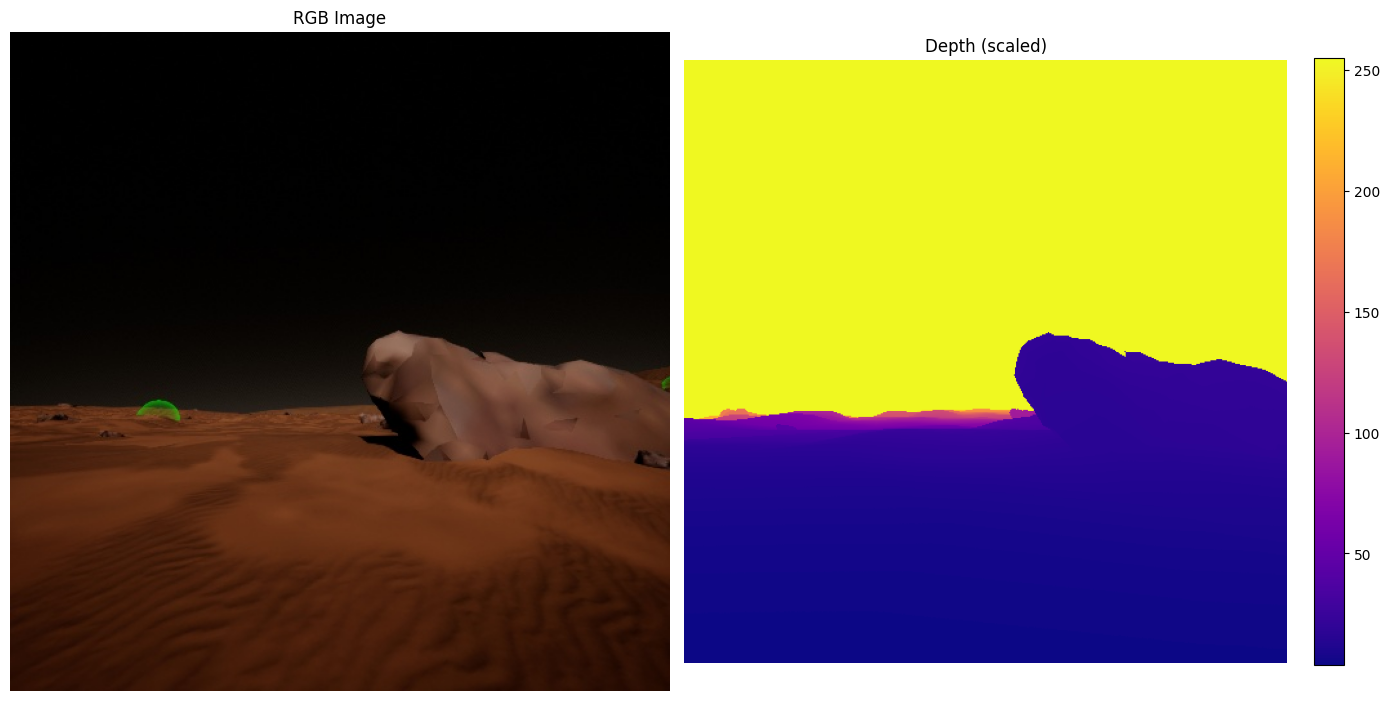

In [21]:
import cv2
from matplotlib import pyplot as plt

depth_vis = cv2.convertScaleAbs(depth_data, alpha=0.02)

# display RGB and scaled depth side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# left: RGB (if available)
if rgb_img is None:
    axes[0].text(0.5, 0.5, "rgb_img is None", ha='center', va='center', fontsize=12)
    axes[0].axis('off')
else:
    if rgb_img.ndim == 3 and rgb_img.shape[2] == 3:
        axes[0].imshow(cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB))
    else:
        axes[0].imshow(rgb_img, cmap='gray')
    axes[0].set_title('RGB Image')
    axes[0].axis('off')

# right: depth visualization (scaled)
im = axes[1].imshow(depth_vis, cmap='plasma')
axes[1].set_title('Depth (scaled)')
axes[1].axis('off')

# colorbar for depth
fig.colorbar(im, ax=axes[1], fraction=0.046, pad=0.04)
plt.tight_layout()


In [22]:
depth_data.max()

9999999.0

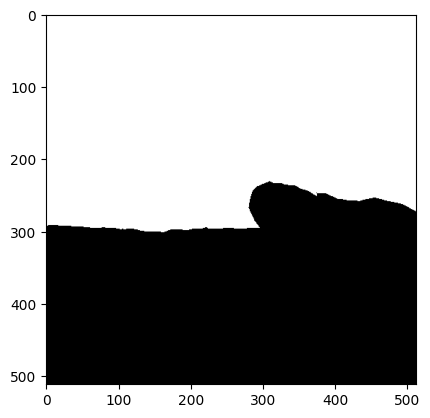

In [24]:
binary_mask = (depth_data == depth_data.max()).astype(np.uint8) * 255
plt.imshow(binary_mask, cmap='gray')

Rock depth values in bounding box: [[9.9999990e+06 9.9999990e+06 9.9999990e+06 ... 9.9999990e+06
  9.9999990e+06 9.9999990e+06]
 [9.9999990e+06 9.9999990e+06 9.9999990e+06 ... 9.9999990e+06
  9.9999990e+06 9.9999990e+06]
 [9.9999990e+06 9.9999990e+06 9.9999990e+06 ... 9.9999990e+06
  9.9999990e+06 9.9999990e+06]
 ...
 [8.0065491e+02 7.9914026e+02 7.9892670e+02 ... 8.0811884e+02
  8.1271490e+02 8.1813507e+02]
 [7.8821759e+02 7.8730890e+02 7.8672095e+02 ... 7.9682697e+02
  7.9808075e+02 7.9910632e+02]
 [7.7604712e+02 7.7515961e+02 7.7492834e+02 ... 7.8587347e+02
  7.8773798e+02 7.8820752e+02]]


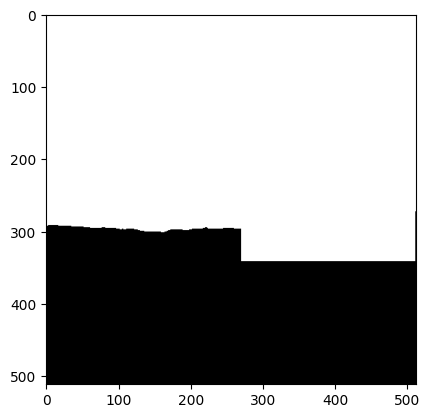

In [ ]:
# use existing `rock_location` and `binary_mask` to draw a green bounding box on the mask and display it
# assume rock_location format is [x1, y1, x2, y2]
bbox = rock_location[0].astype(int)
x1, y1, x2, y2 = bbox

# ensure coordinates are within mask bounds
h, w = binary_mask.shape[:2]
x1 = int(np.clip(x1, 0, w-1))
x2 = int(np.clip(x2, 0, w-1))
y1 = int(np.clip(y1, 0, h-1))
y2 = int(np.clip(y2, 0, h-1))

binary_mask[y1:y2, x1:x2] = 255

plt.imshow(binary_mask, cmap='gray')

In [ ]:
#apply mask to depth image to extract rock depth values
rock_depth_values = depth_data[binary_mask == 255]



In [3]:
import numpy as np

def depth_to_pointcloud(depth_data, binary_mask):
    fx, fy = 256, 256
    cx, cy = 256, 256

    points = np.empty((512,512, 3), dtype=np.float32) 

    for v in range(depth_data.shape[0]):
        for u in range(depth_data.shape[1]):
            if binary_mask[v][u] != 255:
                Z = depth_data[v, u]
                if Z == 0:  # skip invalid
                    continue
                X = (u - cx) * Z / fx
                Y = (v - cy) * Z / fy
                points[v][u] = [X, Y, Z]
            else:
                points[v][u] = [0.0, 0.0, 0.0]
    return np.array(points)

def find_centroid(depth_array):
    valid_points = depth_array[np.all(depth_array != 0.0, axis=2)]
    if valid_points.size == 0:
        print("here")
        return None
    centroid = np.mean(valid_points, axis=0)

    print(centroid)
    return centroid
# points = depth_to_pointcloud(depth_data)

In [9]:

def determine_speed(rock_position, depth_array):

    sky_binary_mask = (depth_array == depth_array.max()).astype(np.uint8) * 255
    tf_depth_data = depth_to_pointcloud(depth_array, sky_binary_mask)

    print(tf_depth_data.shape)

    distance_rock = []
    for pos in rock_position:
        rock_depth = tf_depth_data[int(pos[1]):int(pos[3]), int(pos[0]):int(pos[2]), :]
        centroid = find_centroid(rock_depth)
        if centroid is None:
            distance_rock.append(float('nan'))
        else:
            distance_rock.append(float(np.linalg.norm(centroid)))
        #setting all the rocks depth valus to zero
        tf_depth_data[int(pos[2]):int(pos[3]), int(pos[0]):int(pos[1])] = [0.0, 0.0, 0.0]

    # compute average height of the terrain excluding rocks
    z_vals = tf_depth_data[..., 2].ravel()
    z_vals = z_vals[z_vals > 0]

    if z_vals.size == 0:
        avg_height = float('nan')
    else:
        # exclude outliers using percentiles (use 5th-95th percentile range)
        low_p, high_p = np.percentile(z_vals, [5, 95])
        z_filtered = z_vals[(z_vals >= low_p) & (z_vals <= high_p)]

        
        # compute average change in angle (slope) across the terrain
        z_img = tf_depth_data[..., 2].copy()
        z_img[z_img <= 0] = np.nan

        # fill NaNs with the mean of the filtered z for stable gradient computation
        fill_value = float(np.nanmean(z_filtered)) if z_filtered.size > 0 else 0.0
        z_filled = np.nan_to_num(z_img, nan=fill_value)

        # compute gradients (dz/dy, dz/dx) in image pixel space
        dz_dy, dz_dx = np.gradient(z_filled)  # dy: rows, dx: cols

        # slope angle at each pixel = arctan(sqrt((dz/dx)^2 + (dz/dy)^2))
        slope_rad = np.arctan(np.sqrt(dz_dx**2 + dz_dy**2))

        # consider only pixels that were valid (non-nan in original z_img)
        valid_mask = ~np.isnan(z_img)
        slope_vals = slope_rad[valid_mask]

        if slope_vals.size == 0:
            avg_angle_deg = float('nan')
        else:
            avg_angle_deg = float(np.degrees(np.nanmean(slope_vals)))

        # use average angle (degrees) as the returned metric
        avg_height = avg_angle_deg

    # return average height along with the computed rock distances
    return {"avg_height": avg_height, "rock_distances": distance_rock}



In [10]:
import numpy as np
rock_location = np.array([[     270.43,      223.53,         512,      342.05]], dtype=np.float32)
determine_speed(rock_location, depth_data)

(512, 512, 3)
[486.199   149.35469 992.59375]


{'avg_height': 68.05677795410156, 'rock_distances': [1115.3199462890625]}